In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv(r'C:\Users\User\Downloads\kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
import random
ran = [(row, col) for row in range(df.shape[0]) for col in range(df.shape[1])]
print(len(ran))
for row, col in random.sample(ran, (round(.06*len(ran)))):
    df.iat[row, col] = None

453873


C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
print(df.dtypes)

id               float64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
grade            float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
zipcode          float64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object


In [8]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7.0,NaN,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,NaN,NaN,1951.0,1991.0,98125.0,47.7210,-122.319,NaN,NaN
2,5.631500e+09,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,NaN,2720.0,8062.0
3,2.487201e+09,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,NaN,-122.393,1360.0,5000.0
4,1.954401e+09,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [9]:
print(df['condition'].unique())

[ 3.  5. nan  4.  1.  2.]


In [10]:
df.isnull().sum().sum()

27232

In [11]:
percent_missing = df.isnull().sum() * 100 / len(df)
round(percent_missing.mean(),2)

6.0

# Removing some columns because of redundancy and no use.

In [12]:
df.drop(['id','date'], axis =1, inplace = True)

In [13]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,NaN,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,NaN,NaN,1951.0,1991.0,98125.0,47.7210,-122.319,NaN,NaN
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,NaN,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,NaN,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [14]:
df.shape

(21613, 19)

In [15]:
df.fillna(value=pd.np.nan, inplace=True)
#Replacing None values with NaN

### Imputing Numerical Variables

In [16]:
dfn=df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']]
dfn.head(
  
)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,NaN,NaN,1951.0,1991.0,98125.0,47.7210,-122.319,NaN,NaN
2,180000.0,2.0,1.00,770.0,10000.0,1.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,NaN,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,1050.0,910.0,1965.0,0.0,98136.0,NaN,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [17]:
for col in dfn:
    df[col] = df[col].fillna(df[col].median())

### Imputing Categorical Variables

In [18]:
dfc = df[['waterfront','view','condition','grade']]
for col in dfc:
    df[col] = df[col].fillna(df[col].value_counts().index[0])
    

In [19]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [20]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1560.0,0.0,1955.0,0.0,98178.0,47.51120,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,1560.0,0.0,1951.0,1991.0,98125.0,47.72100,-122.319,1840.0,7611.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.73790,-122.230,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.57145,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.61680,-122.045,1800.0,7503.0


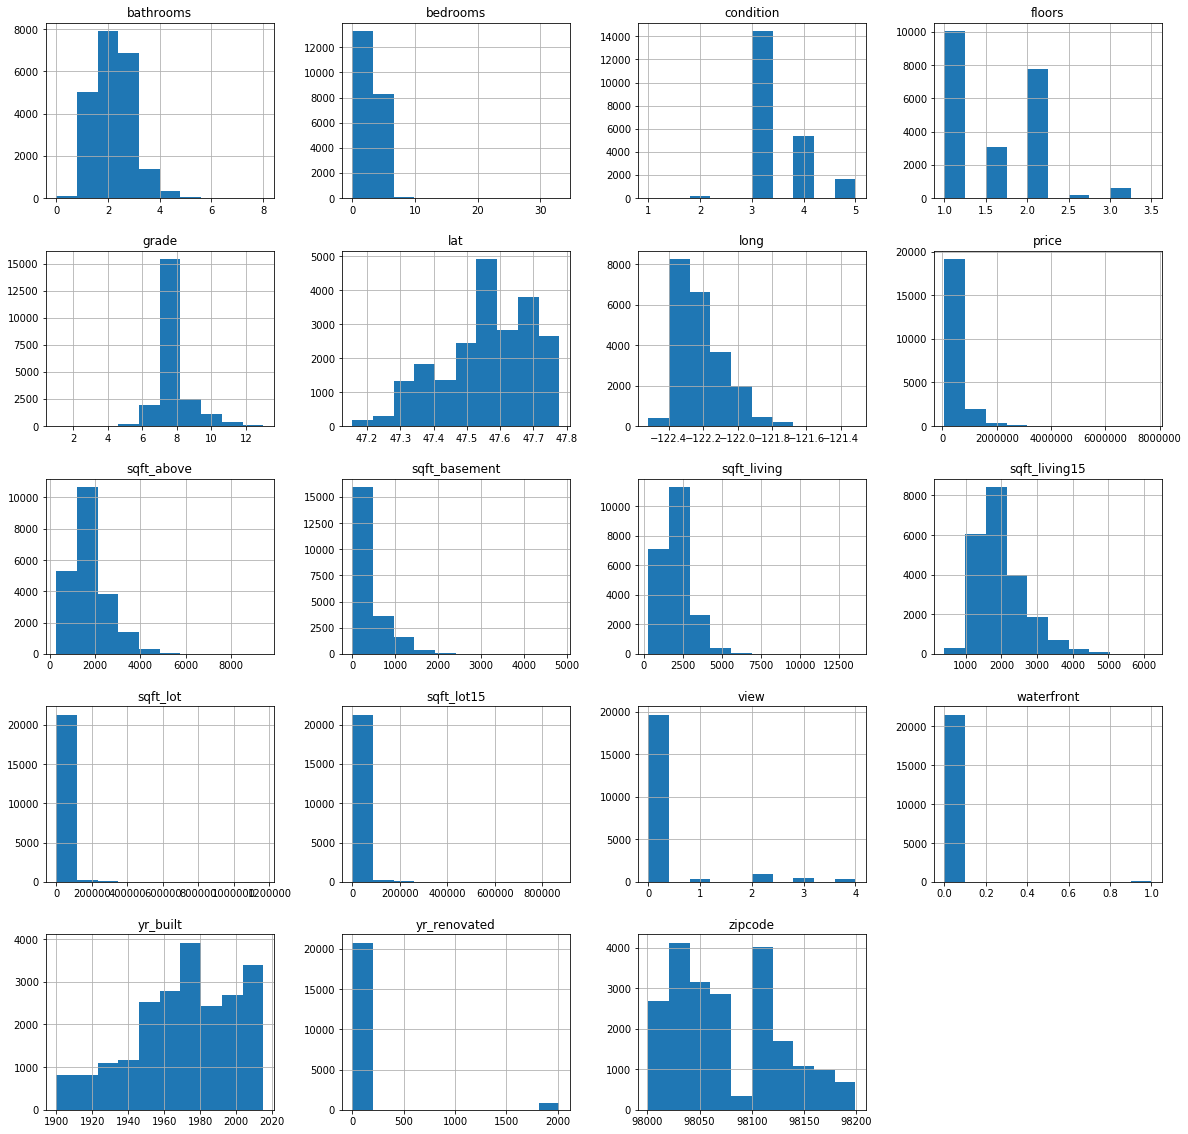

In [21]:
pd.DataFrame.hist(df, figsize = [20,20]);

In [22]:
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

In [23]:
X = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']].values
X

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ..., -1.22319e+02,
         1.84000e+03,  7.61100e+03],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ..., -1.22230e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.84000e+03,  2.00700e+03],
       [ 3.00000e+00,  2.25000e+00,  1.60000e+03, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.84000e+03,  1.35700e+03]])

In [24]:
y = df['price'].values

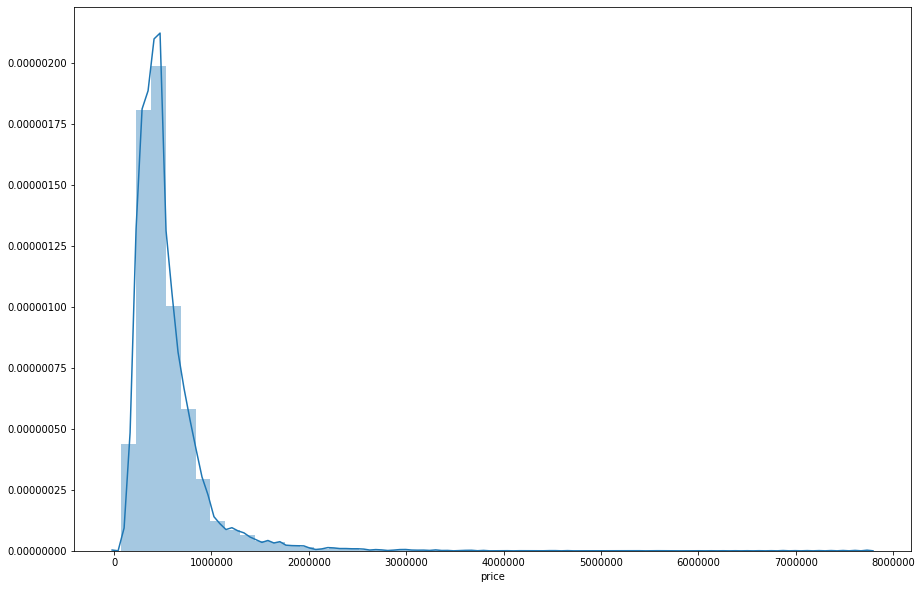

In [25]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['price'])

In [26]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,random_state=0)
print('X_train shape is', X_train_org.shape)
print('X_test shape is', X_test_org.shape)
print('y_train shape is', y_train.shape)
print('y_test shape is', y_test.shape)

X_train shape is (16209, 18)
X_test shape is (5404, 18)
y_train shape is (16209,)
y_test shape is (5404,)


## Corelation Matrix

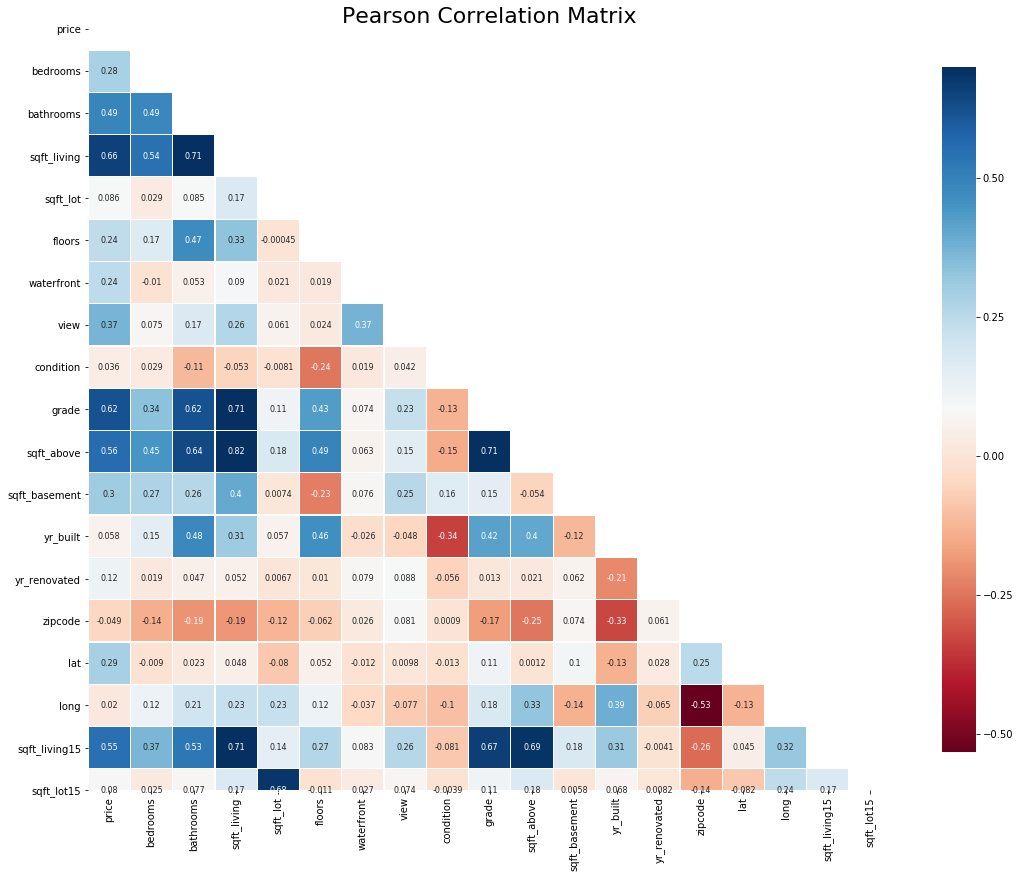

In [27]:
import seaborn as sns
X2 = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(df[X2].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(18, 14))
plt.title('Pearson Correlation Matrix',fontsize=22)

sns.heatmap(df[X2].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="RdBu",cbar=True, #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

## Evaluation

### To evaluate the regression model we will use R2_score of the model , testing and training score of the model,mean squared Error 

### Having a R-squared value closer to one and smaller mean squared Error means a better fit.

## Scale the Data

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## Linear Regression

In [0]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
pred1= regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred1})
df1 = df.head(25)
df1

,Actual,Predicted
0,450000.0,3.466693e+05
1,1578000.0,1.090360e+06
2,562100.0,3.859767e+05
3,631500.0,4.893388e+05
4,780000.0,9.865767e+05
5,485000.0,3.943615e+05
6,340000.0,4.119672e+05
7,335606.0,4.008222e+05
8,425000.0,5.588269e+05
9,450000.0,1.236322e+06


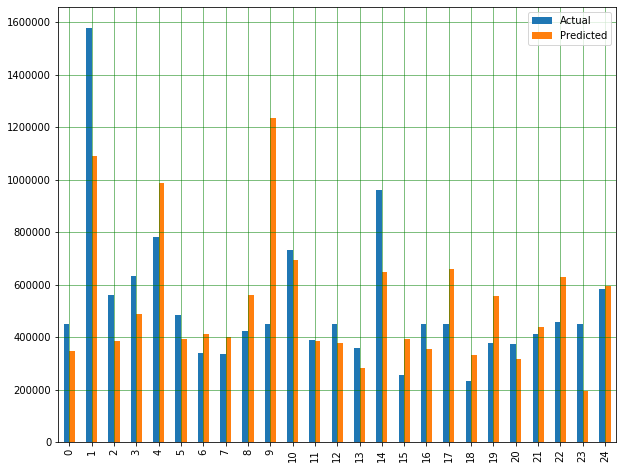

In [0]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [0]:
print('Mean Squared Error:', mean_squared_error(y_test, pred1))
print('R2_Score:',r2_score(y_test,pred1))
print("Train scores: {}".format(regressor.score(X_train, y_train)))
print("Test scores: {}".format(regressor.score(X_test, y_test)))

Mean Squared Error: 46582573494.097404
R2_Score: 0.6149401494604461
Train scores: 0.6423550653435969
Test scores: 0.6149401494604461


In [0]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## Ridge Regression

#### Alpha = 0.1


In [0]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score


In [0]:
Ridge_model=linear_model.Ridge(alpha=0.1)
Ridge_model.fit(X_train,y_train)
pred2 = Ridge_model.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred2})
df2 = df.head(25)
df2

,Actual,Predicted
0,450000.0,3.466882e+05
1,1578000.0,1.090288e+06
2,562100.0,3.857702e+05
3,631500.0,4.893861e+05
4,780000.0,9.865433e+05
5,485000.0,3.945043e+05
6,340000.0,4.122996e+05
7,335606.0,4.007703e+05
8,425000.0,5.588831e+05
9,450000.0,1.236098e+06


In [0]:
print('Mean Squared Error:', mean_squared_error(y_test, pred2))
print('R2_Score:',r2_score(y_test,pred2))
print("Train scores: {}".format(Ridge_model.score(X_train, y_train)))
print("Test scores: {}".format(Ridge_model.score(X_test, y_test)))

Mean Squared Error: 46576794478.53589
R2_Score: 0.6149879198325288
Train scores: 0.6423543438252077
Test scores: 0.6149879198325288


#### Alpha = 100

In [0]:
Ridge_model=linear_model.Ridge(alpha=100)
Ridge_model.fit(X_train,y_train)
pred3 = Ridge_model.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred3})
df3 = df.head(25)
df3

,Actual,Predicted
0,450000.0,3.865389e+05
1,1578000.0,1.006197e+06
2,562100.0,3.553775e+05
3,631500.0,4.796561e+05
4,780000.0,9.580633e+05
5,485000.0,4.663224e+05
6,340000.0,4.281863e+05
7,335606.0,4.038339e+05
8,425000.0,5.652823e+05
9,450000.0,1.155275e+06


In [0]:

print('Mean Squared Error:', mean_squared_error(y_test, pred3))
print('R2_Score:',r2_score(y_test,pred3))
print("Train scores: {}".format(Ridge_model.score(X_train, y_train)))
print("Test scores: {}".format(Ridge_model.score(X_test, y_test)))

Mean Squared Error: 49595878020.43694
R2_Score: 0.5900316374674474
Train scores: 0.6095661079820751
Test scores: 0.5900316374674474


## Lasso regression

In [0]:
lasso_model = linear_model.Lasso(alpha=0.1, normalize=True)

In [0]:
lasso_model.fit(X_train,y_train)
pred4 = lasso_model.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred4})
df4 = df.head(25)
df4

,Actual,Predicted
0,450000.0,3.467210e+05
1,1578000.0,1.090278e+06
2,562100.0,3.859829e+05
3,631500.0,4.893577e+05
4,780000.0,9.866222e+05
5,485000.0,3.943659e+05
6,340000.0,4.120098e+05
7,335606.0,4.008503e+05
8,425000.0,5.588670e+05
9,450000.0,1.236250e+06


In [0]:
print('Mean Squared Error:', mean_squared_error(y_test, pred4))
print('R2_Score:',r2_score(y_test,pred4))
print("Train scores: {}".format(lasso_model.score(X_train, y_train)))
print("Test scores: {}".format(lasso_model.score(X_test, y_test)))

Mean Squared Error: 46582229650.55274
R2_Score: 0.6149429917324372
Train scores: 0.6423550326810881
Test scores: 0.6149429917324372


In [0]:
lasso_model = linear_model.Lasso(alpha=100, normalize=True)
lasso_model.fit(X_train,y_train)
pred5 = lasso_model.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred5})
df5 = df.head(25)
df5

,Actual,Predicted
0,450000.0,3.906947e+05
1,1578000.0,9.826132e+05
2,562100.0,3.891103e+05
3,631500.0,4.988730e+05
4,780000.0,1.004343e+06
5,485000.0,4.117817e+05
6,340000.0,3.972739e+05
7,335606.0,4.297531e+05
8,425000.0,5.979082e+05
9,450000.0,1.189060e+06


In [0]:
print('Mean Squared Error:', mean_squared_error(y_test, pred5))
print('R2_Score:',r2_score(y_test,pred5))
print("Train scores: {}".format(lasso_model.score(X_train, y_train)))
print("Test scores: {}".format(lasso_model.score(X_test, y_test)))

Mean Squared Error: 48622736705.17709
R2_Score: 0.5980757969309709
Train scores: 0.6246693592188147
Test scores: 0.5980757969309709


## KNN

In [0]:
from sklearn.neighbors import KNeighborsRegressor
train_score_list = []
test_score_list = []
for i in range(1,15):
        knn=KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train,y_train)
        
        train_score_list.append(knn.score(X_train, y_train))
        test_score_list.append(knn.score(X_test, y_test))
print(train_score_list)
print(test_score_list)        

[0.9995385912289793, 0.8834529739414098, 0.8407166314553927, 0.8139663835238473, 0.7944394796944187, 0.7842027936343519, 0.7720471729981375, 0.7615251236338358, 0.7522718482073226, 0.7462721831131987, 0.7387626346956907, 0.7324202972409362, 0.7278713387859131, 0.7241357726275579]
[0.5855787339642811, 0.6839654697288511, 0.694848480318251, 0.6964637027632162, 0.695312041797669, 0.6978685598488458, 0.6918867435825755, 0.6902530919274623, 0.6843497283994753, 0.6846376167855495, 0.6811036285630185, 0.6801281831289572, 0.6771316951580955, 0.6723713029558799]


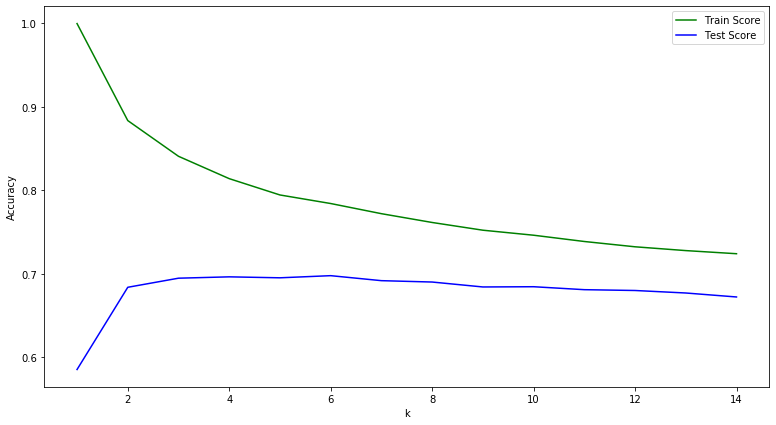

In [0]:
x_axis = range(1,15)
%matplotlib inline
fig ,ax= plt.subplots(figsize = (13,7))
plt.plot(x_axis, train_score_list, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_list, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

#### K=14 is better parameter

In [0]:
knn=KNeighborsRegressor(14)
knn.fit(X_train,y_train)
pred6=knn.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred6})
df6 = df.head(25)
df6        

,Actual,Predicted
0,450000.0,4.232286e+05
1,1578000.0,1.214750e+06
2,562100.0,4.245295e+05
3,631500.0,5.557143e+05
4,780000.0,8.381571e+05
5,485000.0,4.579393e+05
6,340000.0,3.413450e+05
7,335606.0,3.697020e+05
8,425000.0,4.523321e+05
9,450000.0,1.180621e+06


In [0]:
print('Mean Squared Error:', mean_squared_error(y_test, pred6))
print('R2_Score:',r2_score(y_test,pred6))
print("Train scores: {}".format(knn.score(X_train, y_train)))
print("Test scores: {}".format(knn.score(X_test, y_test)))

Mean Squared Error: 39634845953.032906
R2_Score: 0.6723713029558799
Train scores: 0.7241357726275579
Test scores: 0.6723713029558799


## Polynomial 

##### For Polynomial Regression degree = 2 is best parameter 

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)

X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)
poly_lr=LinearRegression()
poly_lr.fit(X_train,y_train)
pred7=poly_lr.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred7})
df7 = df.head(25)
df7


,Actual,Predicted
0,450000.0,3.648252e+05
1,1578000.0,1.514978e+06
2,562100.0,3.900617e+05
3,631500.0,5.317368e+05
4,780000.0,8.713775e+05
5,485000.0,3.937503e+05
6,340000.0,4.212612e+05
7,335606.0,1.911912e+05
8,425000.0,5.138174e+05
9,450000.0,1.394540e+06


In [0]:
print('Mean Squared Error:', mean_squared_error(y_test, pred7))
print('R2_Score:',r2_score(y_test,pred7))
print("Train scores: {}".format(poly_lr.score(X_train, y_train)))
print("Test scores: {}".format(poly_lr.score(X_test, y_test)))

Mean Squared Error: 35160166035.6409
R2_Score: 0.7093598042550113
Train scores: 0.7660247549241391
Test scores: 0.7093598042550113


## SVM

In [0]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
svm_reg = SVR(gamma='scale',C=10000)
svm_reg.fit(X_train,y_train)
pred8 = svm_reg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred8})
df8 = df.head(25)
df8

,Actual,Predicted
0,450000.0,3.665545e+05
1,1578000.0,9.482977e+05
2,562100.0,3.717312e+05
3,631500.0,4.985149e+05
4,780000.0,8.292499e+05
5,485000.0,4.275879e+05
6,340000.0,3.632260e+05
7,335606.0,3.226534e+05
8,425000.0,5.159419e+05
9,450000.0,1.045572e+06


In [0]:
print('Mean Squared Error:', mean_squared_error(y_test, pred8))
print('R2_Score:',r2_score(y_test,pred8))
print("Train scores: {}".format(svm_reg.score(X_train, y_train)))
print("Test scores: {}".format(svm_reg.score(X_test, y_test)))

Mean Squared Error: 53460370268.87432
R2_Score: 0.5580870561363382
Train scores: 0.5462131386241571
Test scores: 0.5580870561363382


##### This calculation is for SVM polynomial

In [0]:
deg_range = [1,2,3,4,5,6,7]
c_range = [0.001,0.01,0.1,1,10,100]


train_score_list = []
test_score_list = []
index=[]

for x in deg_range:
    for c in c_range:
        index.append((x,c))
        svr_poly = SVR(kernel='poly', degree=x, C=c)
        svr_poly.fit(X_train,y_train)
        train_score_list.append(svr_poly.score(X_train,y_train))
        test_score_list.append(svr_poly.score(X_test, y_test))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

Text(0.5, 0, 'Degree and C')

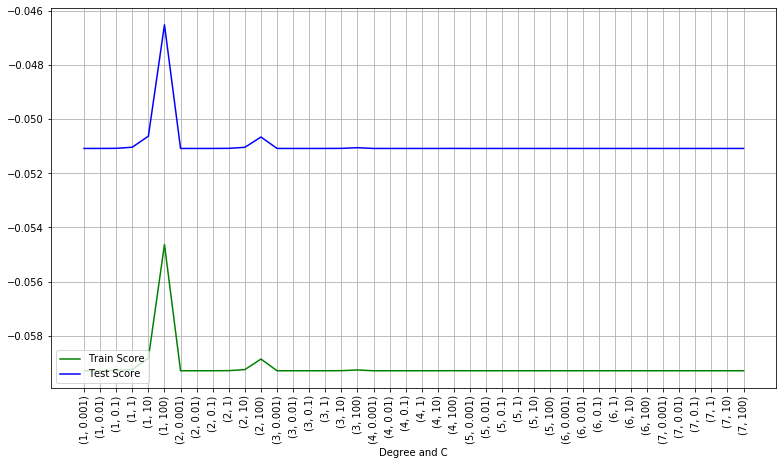

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (13,7))
plt.plot(range(len(index)), train_score_list, c = 'g', label = 'Train Score')
plt.plot(range(len(index)), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel('Degree and C')

### SVM Linear


In [0]:
c_range = [0.001,0.01,0.1,1,10,100]

train_score_list = []
test_score_list = []

for x in c_range:
    svm_lin = SVR(kernel='linear', C=x)
    svm_lin.fit(X_train,y_train)
    train_score_list.append(svm_lin.score(X_train,y_train))
    test_score_list.append(svm_lin.score(X_test, y_test))

print(train_score_list)
print(test_score_list)

[-0.057489170979395876, -0.05740772579221787, -0.056592005182010796, -0.048493467957018144, 0.022806234892384092, 0.36732274868835046]
[-0.04961280924400091, -0.049531113599276866, -0.048712977922422684, -0.040591482583778093, 0.030878072356886666, 0.36928630611913527]


Text(0.5, 0, 'C')

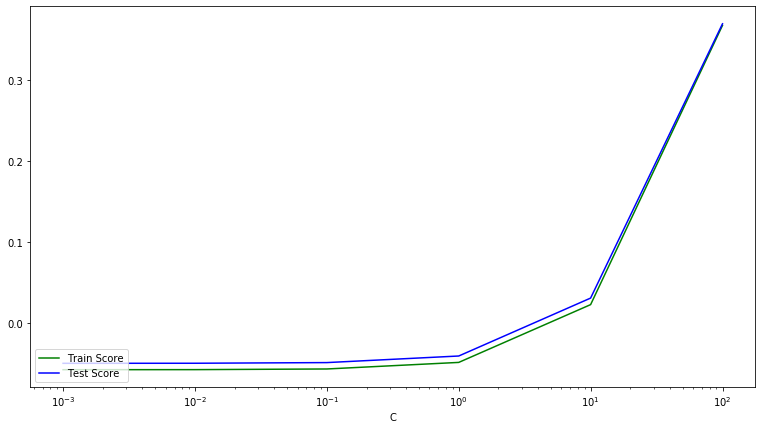

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (13,7))
plt.plot(c_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(c_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('C')

#### C= 100 seems best parameter

In [0]:
svm_lin = SVR(kernel='linear',C=100)
svm_lin.fit(X_train,y_train)
pred9 = svm_reg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred9})
df9 = df.head(25)
df9

,Actual,Predicted
0,450000.0,458976.210571
1,1578000.0,524177.489387
2,562100.0,426976.500627
3,631500.0,439295.553618
4,780000.0,523869.617910
5,485000.0,478419.778488
6,340000.0,409588.334244
7,335606.0,425984.350872
8,425000.0,460194.555419
9,450000.0,530122.737134


In [0]:
print('Mean Squared Error:', mean_squared_error(y_test, pred9))
print('R2_Score:',r2_score(y_test,pred9))
print("Train scores: {}".format(svm_lin.score(X_train, y_train)))
print("Test scores: {}".format(svm_lin.score(X_test, y_test)))

Mean Squared Error: 111819301455.66464
R2_Score: 0.0756817351147111
Train scores: 0.36732274868835046
Test scores: 0.36928630611913527


### SVM rbf

In [0]:
from sklearn.svm import SVR
c_range = [0.001,0.01,0.1,1,10,100]
g_range = [0.001,0.01,0.1,1,10,100]

train_score_list = []
test_score_list = []
index=[]

for x in c_range:
    for g in g_range:
        index.append((x,g))
        svm_rbf = SVR(kernel='rbf', gamma=g,C=x)
        svm_rbf.fit(X_train,y_train)
        train_score_list.append(svm_rbf.score(X_train,y_train))
        test_score_list.append(svm_rbf.score(X_test, y_test))
        

Text(0.5, 0, 'C and Gamma')

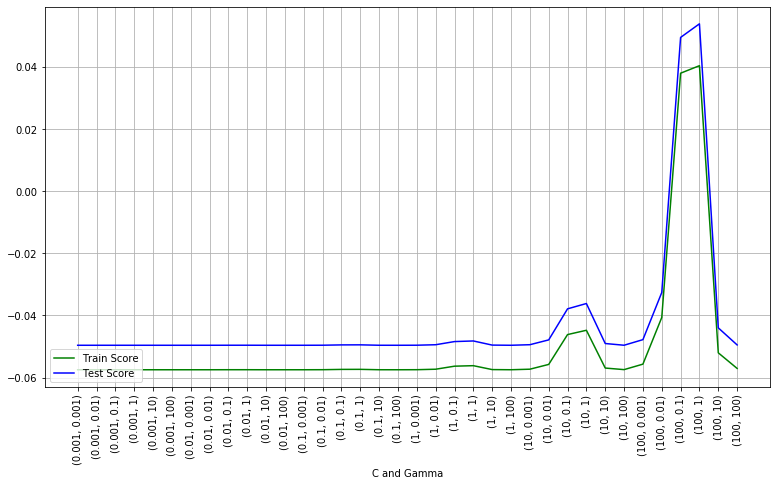

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (13,7))
plt.plot(range(len(index)), train_score_list, c = 'g', label = 'Train Score')
plt.plot(range(len(index)), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel('C and Gamma')

#### C=100 and gamma=1 is best parameter 

In [0]:
svm_rbf = SVR(kernel='rbf',gamma=1,C=100)
svm_rbf.fit(X_train,y_train)
pred10 = svm_reg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred10})
df10 = df.head(25)
df10

,Actual,Predicted
0,450000.0,458976.210571
1,1578000.0,524177.489387
2,562100.0,426976.500627
3,631500.0,439295.553618
4,780000.0,523869.617910
5,485000.0,478419.778488
6,340000.0,409588.334244
7,335606.0,425984.350872
8,425000.0,460194.555419
9,450000.0,530122.737134


In [0]:
print('Mean Squared Error:', mean_squared_error(y_test, pred10))
print('R2_Score:',r2_score(y_test,pred10))
print("Train scores: {}".format(svm_rbf.score(X_train, y_train)))
print("Test scores: {}".format(svm_rbf.score(X_test, y_test)))

Mean Squared Error: 111819301455.66464
R2_Score: 0.0756817351147111
Train scores: 0.04031790719112138
Test scores: 0.053786648305595874


### SVM polynomial

### We found that c=100 and degree=1 is best parameter

In [0]:

svm_pol = SVR(kernel='poly',gamma='scale',degree=1,C=100)
svm_pol.fit(X_train,y_train)
pred11 = svm_reg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred11})
df11 = df.head(25)
df11

,Actual,Predicted
0,450000.0,458976.210571
1,1578000.0,524177.489387
2,562100.0,426976.500627
3,631500.0,439295.553618
4,780000.0,523869.617910
5,485000.0,478419.778488
6,340000.0,409588.334244
7,335606.0,425984.350872
8,425000.0,460194.555419
9,450000.0,530122.737134


In [0]:
print('Mean Squared Error:', mean_squared_error(y_test, pred11))
print('R2_Score:',r2_score(y_test,pred11))
print("Train scores: {}".format(svm_pol.score(X_train, y_train)))
print("Test scores: {}".format(svm_pol.score(X_test, y_test)))

Mean Squared Error: 111819301455.66464
R2_Score: 0.0756817351147111
Train scores: 0.07821518171578146
Test scores: 0.08615771527658966


## Best Performing Model - Polynomial Regression

### Test Score : 0.71
### Train Score: 0.77
### Accuracy : 71%
### R2 Score: 0.7093
### Mean Squared Error: 35160166035.6409


# ----------------------------------------------------------------------------------------------------------

# Project 2

## Bagging Regressor with Linear Regressor

In [29]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_samples':[0.1, 0.5, 1],
    'max_features': [2, 5, 10],
    'n_estimators':[100, 200, 300, 500]
}
clf = GridSearchCV(BaggingRegressor(LinearRegression(),bootstrap=True),param_grid,iid=False,cv=5)

In [30]:
clf.fit(X_train, y_train)
print("\n The best parameters across ALL searched params:\n",
          clf.best_params_)


 The best parameters across ALL searched params:
 {'max_features': 10, 'max_samples': 0.1, 'n_estimators': 500}


In [31]:
 print("The best parameters across ALL searched params: {:.4f}".format
         (clf.best_score_))

The best parameters across ALL searched params: 0.6096


In [32]:
pred13 = clf.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred13})
df13 = df.head(25)
df13

,Actual,Predicted
0,297000.0,3.822572e+05
1,1578000.0,1.354444e+06
2,562100.0,4.488910e+05
3,450000.0,5.539237e+05
4,780000.0,9.199339e+05
5,485000.0,3.890832e+05
6,340000.0,4.422637e+05
7,335606.0,5.030461e+05
8,425000.0,6.161757e+05
9,490000.0,1.165080e+06


In [33]:
from  sklearn.metrics import accuracy_score
print('Train score: {:.2f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(clf.score(X_test, y_test)))
print('Mean Squared Error:', mean_squared_error(y_test, pred13))
print('R2_Score:',r2_score(y_test,pred13))

Train score: 0.61
Test score: 0.60
Mean Squared Error: 49360681973.34704
R2_Score: 0.601089898507893


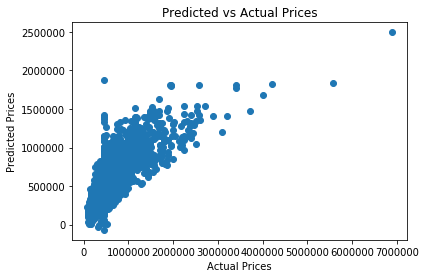

In [45]:
plt.plot(y_test,pred13,'o')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices")
plt.show()

##  Decision tree with Bagging

In [39]:
from sklearn.tree import DecisionTreeRegressor
param_grid = { 'max_depth': [2, 3, 5, 10 , 15]}    
dtree_model=DecisionTreeRegressor(random_state=0)    
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=5,iid= False)   
dtree_gscv.fit(X_train,y_train)
print("\n The best parameters across ALL searched params:\n",
         dtree_gscv.best_params_)


 The best parameters across ALL searched params:
 {'max_depth': 10}


#### Using GridSearchCV we found that max depth 10 is best parameter for decision tree

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
param_grid = {
    'max_samples':[0.1, 0.5, 1],
    'max_features': [2, 5, 10],
    'n_estimators':[100, 200, 300, 500]
}

dtree_bag = GridSearchCV(BaggingRegressor(DecisionTreeRegressor(max_depth = 10,random_state=0),bootstrap=True,random_state=0),param_grid,iid=False,cv=5)


In [41]:
dtree_bag.fit(X_train, y_train)
print("\n The best parameters across ALL searched params:\n",
         dtree_bag.best_params_)
print("The best parameters across ALL searched params: {:.4f}".format
         (dtree_bag.best_score_))


 The best parameters across ALL searched params:
 {'max_features': 10, 'max_samples': 0.5, 'n_estimators': 300}
The best parameters across ALL searched params: 0.7486


In [42]:
pred14 = dtree_bag.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred14})
df14 = df.head(25)
df14

,Actual,Predicted
0,297000.0,3.774587e+05
1,1578000.0,1.528901e+06
2,562100.0,5.181367e+05
3,450000.0,6.016978e+05
4,780000.0,7.114381e+05
5,485000.0,4.728204e+05
6,340000.0,3.741692e+05
7,335606.0,4.083002e+05
8,425000.0,4.893245e+05
9,490000.0,1.473207e+06


In [43]:
print('Train score: {:.2f}'.format(dtree_bag.score(X_train, y_train)))
print('Test score: {:.2f}'.format(dtree_bag.score(X_test, y_test)))
print('Mean Squared Error:', mean_squared_error(y_test, pred14))
print('R2_Score:',r2_score(y_test,pred14))

Train score: 0.85
Test score: 0.78
Mean Squared Error: 27514660029.694492
R2_Score: 0.7776392994146066


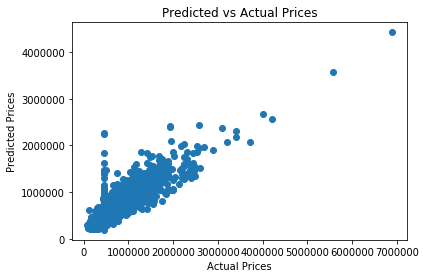

In [46]:
plt.plot(y_test,pred14,'o')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices")
plt.show()

## Decision tree with pasting

In [47]:
param_grid = {
    'max_samples':[0.1, 0.5, 1],
    'max_features': [2, 5, 10],
    'n_estimators':[100, 200, 300, 500]
}

dtree_pas = GridSearchCV(BaggingRegressor(DecisionTreeRegressor(max_depth = 10,random_state=0),bootstrap=False,random_state=0),param_grid,iid=False,cv=5)
dtree_pas.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                                             max_depth=10,
                                                                             max_features=None,
                                                                             max_leaf_nodes=None,
                                                                             min_impurity_decrease=0.0,
                                                                             min_impurity_split=None,
                                                                             min_samples_leaf=1,
                                                                             min_samples_split=2,
                                                                             min_weight_fraction_leaf=0.0,
                                                             

In [48]:
print("\n The best parameters across ALL searched params:\n",
         dtree_pas.best_params_)
print("The best parameters across ALL searched params: {:.4f}".format
         (dtree_pas.best_score_))


 The best parameters across ALL searched params:
 {'max_features': 10, 'max_samples': 0.5, 'n_estimators': 300}
The best parameters across ALL searched params: 0.7506


In [49]:
pred34 = dtree_pas.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred34})
df34 = df.head(25)
df34

,Actual,Predicted
0,297000.0,3.660743e+05
1,1578000.0,1.502512e+06
2,562100.0,5.168643e+05
3,450000.0,5.982214e+05
4,780000.0,6.945668e+05
5,485000.0,4.712344e+05
6,340000.0,3.768130e+05
7,335606.0,4.142219e+05
8,425000.0,4.865503e+05
9,490000.0,1.495992e+06


In [50]:
print('Train score: {:.2f}'.format(dtree_pas.score(X_train, y_train)))
print('Test score: {:.2f}'.format(dtree_pas.score(X_test, y_test)))
print('Mean Squared Error:', mean_squared_error(y_test, pred34))
print('R2_Score:',r2_score(y_test,pred34))

Train score: 0.87
Test score: 0.78
Mean Squared Error: 26741034281.587326
R2_Score: 0.7838913833274863


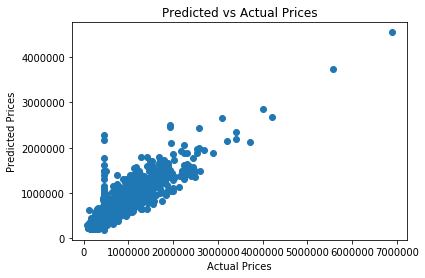

In [51]:
plt.plot(y_test,pred34,'o')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices")
plt.show()

## Linear Regression with Pasting

In [52]:
from sklearn.svm import LinearSVR


lin_pas = BaggingRegressor(LinearSVR(C=100000,max_iter=10),bootstrap=False,random_state=0,max_features=10,max_samples=0.5,n_estimators=300)
lin_pas.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

BaggingRegressor(base_estimator=LinearSVR(C=100000, dual=True, epsilon=0.0,
                                          fit_intercept=True,
                                          intercept_scaling=1.0,
                                          loss='epsilon_insensitive',
                                          max_iter=10, random_state=None,
                                          tol=0.0001, verbose=0),
                 bootstrap=False, bootstrap_features=False, max_features=10,
                 max_samples=0.5, n_estimators=300, n_jobs=None,
                 oob_score=False, random_state=0, verbose=0, warm_start=False)

In [53]:
pred35 = lin_pas.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred35})
df35 = df.head(25)
df35

,Actual,Predicted
0,297000.0,4.165195e+05
1,1578000.0,1.119690e+06
2,562100.0,4.284593e+05
3,450000.0,5.093997e+05
4,780000.0,8.241309e+05
5,485000.0,4.200443e+05
6,340000.0,4.109281e+05
7,335606.0,4.462905e+05
8,425000.0,5.571441e+05
9,490000.0,9.729023e+05


In [54]:
print('Train score: {:.2f}'.format(lin_pas.score(X_train, y_train)))
print('Test score: {:.2f}'.format(lin_pas.score(X_test, y_test)))
print('Mean Squared Error:', mean_squared_error(y_test, pred35))
print('R2_Score:',r2_score(y_test,pred35))

Train score: 0.55
Test score: 0.54
Mean Squared Error: 57307281665.128075
R2_Score: 0.5368691713453877


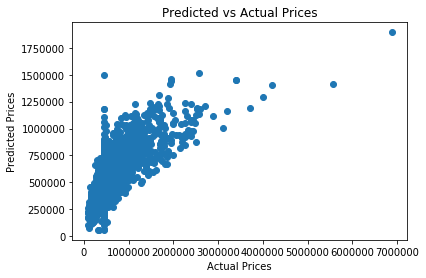

In [55]:
plt.plot(y_test,pred35,'o')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices")
plt.show()

## Decision Tree Adaboost

In [56]:
dtree=DecisionTreeRegressor(max_depth=10,random_state=0)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [57]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10), n_estimators=200, learning_rate=0.5, random_state=0)
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=10,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=0.5, loss='linear', n_estimators=200,
                  random

In [58]:
pred15 = ada.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred15})
df15 = df.head(25)
df15

,Actual,Predicted
0,297000.0,4.013842e+05
1,1578000.0,1.517487e+06
2,562100.0,5.731379e+05
3,450000.0,6.443743e+05
4,780000.0,7.248071e+05
5,485000.0,5.372485e+05
6,340000.0,3.697485e+05
7,335606.0,4.201668e+05
8,425000.0,4.846379e+05
9,490000.0,1.556682e+06


In [59]:
print('Train score: {:.2f}'.format(ada.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada.score(X_test, y_test)))
print('Mean Squared Error:', mean_squared_error(y_test, pred15))
print('R2_Score:',r2_score(y_test,pred15))

Train score: 0.94
Test score: 0.79
Mean Squared Error: 26398896705.663994
R2_Score: 0.7866563802780863


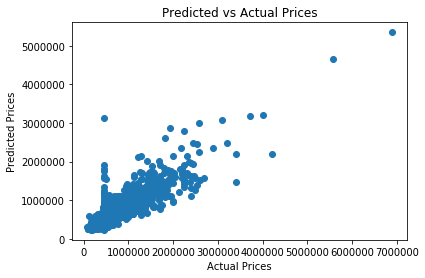

In [60]:
plt.plot(y_test,pred15,'o')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices")
plt.show()

## Linear SVR

In [61]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
param_grid = {
    'max_iter': [2, 5, 10],
    'C':[10,100,1000,10000,100000]
}

regr = GridSearchCV(LinearSVR(random_state=0),param_grid,iid=False,cv=5)
regr.fit(X_train, y_train)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=0, tol=0.0001, verbose=0),
             iid=False, n_jobs=None,
             param_grid={'C': [10, 100, 1000, 10000, 100000],
                         'max_iter': [2, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [62]:
print("\n The best parameters across ALL searched params:\n",
         regr.best_params_)
print("The best parameters across ALL searched params: {:.4f}".format
         (regr.best_score_))


 The best parameters across ALL searched params:
 {'C': 100000, 'max_iter': 10}
The best parameters across ALL searched params: 0.5771


In [63]:
pred16 = regr.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred16})
df16 = df.head(25)
df16

,Actual,Predicted
0,297000.0,4.269771e+05
1,1578000.0,1.205976e+06
2,562100.0,4.577294e+05
3,450000.0,5.442830e+05
4,780000.0,8.558396e+05
5,485000.0,4.005920e+05
6,340000.0,3.766497e+05
7,335606.0,3.527181e+05
8,425000.0,5.320486e+05
9,490000.0,1.002506e+06


In [64]:
print('Train score: {:.2f}'.format(regr.score(X_train, y_train)))
print('Test score: {:.2f}'.format(regr.score(X_test, y_test)))
print('Mean Squared Error:', mean_squared_error(y_test, pred16))
print('R2_Score:',r2_score(y_test,pred16))

Train score: 0.58
Test score: 0.57
Mean Squared Error: 53221811953.634186
R2_Score: 0.5698860396725909


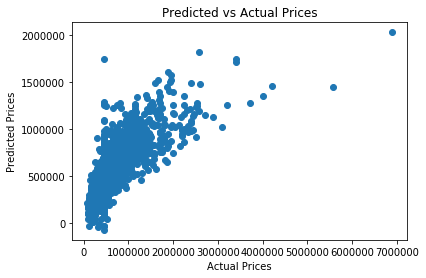

In [65]:
plt.plot(y_test,pred16,'o')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices")
plt.show()

### Linear SVR with AdaBoosting

In [66]:
ada2= AdaBoostRegressor(LinearSVR(C=100000,max_iter=10), n_estimators=10, learning_rate=0.1, random_state=0)
ada2.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

AdaBoostRegressor(base_estimator=LinearSVR(C=100000, dual=True, epsilon=0.0,
                                           fit_intercept=True,
                                           intercept_scaling=1.0,
                                           loss='epsilon_insensitive',
                                           max_iter=10, random_state=None,
                                           tol=0.0001, verbose=0),
                  learning_rate=0.1, loss='linear', n_estimators=10,
                  random_state=0)

In [67]:
pred17 = ada2.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred17})
df17 = df.head(25)
df17

,Actual,Predicted
0,297000.0,4.502301e+05
1,1578000.0,1.246175e+06
2,562100.0,4.767265e+05
3,450000.0,5.650068e+05
4,780000.0,8.969844e+05
5,485000.0,4.273810e+05
6,340000.0,3.916764e+05
7,335606.0,3.808986e+05
8,425000.0,5.619786e+05
9,490000.0,1.062585e+06


In [68]:
print('Train score: {:.2f}'.format(ada2.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada2.score(X_test, y_test)))
print('Mean Squared Error:', mean_squared_error(y_test, pred17))
print('R2_Score:',r2_score(y_test,pred17))

Train score: 0.60
Test score: 0.59
Mean Squared Error: 50580083302.819046
R2_Score: 0.5912352634288651


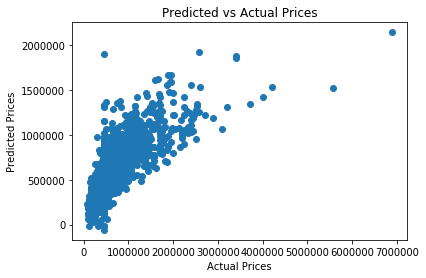

In [69]:
plt.plot(y_test,pred17,'o')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices")
plt.show()

## Gradient Boosting

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate':[0.1, 0.25, 0.5, 0.75, 1],
    'max_features':[2, 5, 10]
}

grd_reg= GridSearchCV(GradientBoostingRegressor(random_state=0),param_grid,iid=False,cv=5)
grd_reg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [71]:
pred18 = grd_reg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred18})
df18 = df.head(25)
df18

,Actual,Predicted
0,297000.0,3.294573e+05
1,1578000.0,1.725777e+06
2,562100.0,5.354617e+05
3,450000.0,6.322800e+05
4,780000.0,7.930578e+05
5,485000.0,4.953212e+05
6,340000.0,3.487444e+05
7,335606.0,3.778379e+05
8,425000.0,4.654095e+05
9,490000.0,1.371017e+06


In [72]:
print("\n The best parameters across ALL searched params:\n",
         grd_reg.best_params_)
print("The best parameters across ALL searched params: {:.4f}".format
         (grd_reg.best_score_))


 The best parameters across ALL searched params:
 {'learning_rate': 0.1, 'max_features': 5, 'n_estimators': 500}
The best parameters across ALL searched params: 0.7855


In [73]:
print('Train score: {:.2f}'.format(grd_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(grd_reg.score(X_test, y_test)))
print('Mean Squared Error:', mean_squared_error(y_test, pred18))
print('R2_Score:',r2_score(y_test,pred18))

Train score: 0.89
Test score: 0.82
Mean Squared Error: 22587913037.900085
R2_Score: 0.8174549799107522


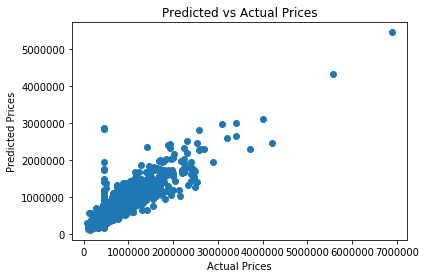

In [74]:
plt.plot(y_test,pred18,'o')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices")
plt.show()

# PCA

In [0]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
pca.transform(X_train)
pca.n_components_

10

### PCA found 10 very important features out of 18 

In [0]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [0]:
print('X_train shape is', X_train.shape)
print('X_test shape is', X_test.shape)
print('y_train shape is', y_train.shape)
print('y_test shape is', y_test.shape)

X_train shape is (16209, 10)
X_test shape is (5404, 10)
y_train shape is (16209,)
y_test shape is (5404,)


## Liear Regression after PCA

In [0]:
pca_lin = LinearRegression()  
pca_lin.fit(X_train, y_train)
pred19= pca_lin.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred19})
df19 = df.head(25)
df19

,Actual,Predicted
0,297000.0,3.969461e+05
1,1578000.0,1.394083e+06
2,562100.0,4.535153e+05
3,631500.0,5.434946e+05
4,780000.0,9.383350e+05
5,485000.0,3.984140e+05
6,340000.0,4.373498e+05
7,335606.0,4.306200e+05
8,425000.0,6.235596e+05
9,490000.0,1.130786e+06


In [0]:
print('Train score after PCA: {:.2f}'.format(pca_lin.score(X_train, y_train)))
print('Test score after PCA: {:.2f}'.format(pca_lin.score(X_test, y_test)))
print('Mean Squared Error after PCA:', mean_squared_error(y_test, pred19))
print('R2_Score after PCA:',r2_score(y_test,pred19))

Train score after PCA: 0.61
Test score after PCA: 0.58
Mean Squared Error after PCA: 53850093238.455574
R2_Score after PCA: 0.576947441025871


<table>
  <thead>
    <tr>
      <th>Linear Model</th>
      <th>Linear Model after PCA</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>MSE: 46582573494.0974</td>
      <td>MSE: 49592760952.07061</td> 
    </tr>
    <tr>
      <td>R2_Score: 0.6149</td>
      <td>R2_Score: 0.5982</td>   
    </tr>
    <tr>
      <td>Train score: 0.6423</td>
      <td>Train score: 0.62</td>   
    </tr>
    <tr>
      <td>Test score: 0.6149</td>
      <td>Test score: 0.60</td>   
    </tr>
  </tbody>
</table>



In [0]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
Ridge_model=linear_model.Ridge(alpha=0.1)
Ridge_model.fit(X_train,y_train)
pred22 = Ridge_model.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred22})
df22 = df.head(25)
df22

,Actual,Predicted
0,297000.0,3.970449e+05
1,1578000.0,1.393821e+06
2,562100.0,4.534870e+05
3,631500.0,5.434355e+05
4,780000.0,9.383242e+05
5,485000.0,3.985166e+05
6,340000.0,4.373393e+05
7,335606.0,4.305993e+05
8,425000.0,6.235287e+05
9,490000.0,1.130686e+06


In [0]:
print('Train score after PCA: {:.2f}'.format(Ridge_model.score(X_train, y_train)))
print('Test score after PCA: {:.2f}'.format(Ridge_model.score(X_test, y_test)))
print('Mean Squared Error after PCA:', mean_squared_error(y_test, pred22))
print('R2_Score after PCA:',r2_score(y_test,pred22))

Train score after PCA: 0.61
Test score after PCA: 0.58
Mean Squared Error after PCA: 53850284283.19497
R2_Score after PCA: 0.5769459401563086


<table>
  <thead>
    <tr>
      <th>Ridge Model</th>
      <th>Ridge Model after PCA</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>MSE: 46576794478.53589</td>
      <td>MSE: 49592128035.1913</td> 
    </tr>
    <tr>
      <td>R2_Score: 0.6149</td>
      <td>R2_Score: 0.5982</td>   
    </tr>
    <tr>
      <td>Train score:  0.64</td>
      <td>Train score: 0.62</td>   
    </tr>
    <tr>
      <td>Test score: 0.61</td>
      <td>Test score: 0.60</td>   
    </tr>
  </tbody>
</table>

 


## Lasso PCA

In [0]:
lasso_model = linear_model.Lasso(alpha=0.1, normalize=True)
lasso_model.fit(X_train,y_train)
pred24 = lasso_model.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred24})
df24 = df.head(25)
df24

,Actual,Predicted
0,297000.0,3.969605e+05
1,1578000.0,1.393936e+06
2,562100.0,4.535333e+05
3,631500.0,5.434794e+05
4,780000.0,9.383182e+05
5,485000.0,3.984415e+05
6,340000.0,4.373533e+05
7,335606.0,4.306162e+05
8,425000.0,6.235457e+05
9,490000.0,1.130715e+06


In [0]:
print('Mean Squared Error:', mean_squared_error(y_test, pred24))
print('R2_Score:',r2_score(y_test,pred24))
print("Train scores: {}".format(lasso_model.score(X_train, y_train)))
print("Test scores: {}".format(lasso_model.score(X_test, y_test)))

Mean Squared Error: 53850337131.708916
R2_Score: 0.5769455249722724
Train scores: 0.6083517171330652
Test scores: 0.5769455249722724


<table>
  <thead>
    <tr>
      <th>Lasso Model</th>
      <th>Lasso Model after PCA</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>MSE: 46582229650.55</td>
      <td>MSE: 49592504597.70</td> 
    </tr>
    <tr>
      <td>R2_Score: 0.61</td>
      <td>R2_Score: 0.59</td>   
    </tr>
    <tr>
      <td>Train score:  0.64</td>
      <td>Train score: 0.62</td>   
    </tr>
    <tr>
      <td>Test score: 0.61</td>
      <td>Test score: 0.60</td>   
    </tr>
  </tbody>
</table>



In [0]:
print('X_train shape is', X_train.shape)
print('X_test shape is', X_test.shape)
print('y_train shape is', y_train.shape)
print('y_test shape is', y_test.shape)

X_train shape is (16209, 10)
X_test shape is (5404, 10)
y_train shape is (16209,)
y_test shape is (5404,)


In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)

X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)
poly_lr=LinearRegression()
poly_lr.fit(X_train,y_train)
pred25=poly_lr.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred25})
df25 = df.head(25)
df25



,Actual,Predicted
0,297000.0,3.495275e+05
1,1578000.0,1.667968e+06
2,562100.0,4.983895e+05
3,631500.0,5.659967e+05
4,780000.0,7.392342e+05
5,485000.0,4.013772e+05
6,340000.0,4.502261e+05
7,335606.0,2.242644e+05
8,425000.0,5.410512e+05
9,490000.0,1.317613e+06


In [0]:
print('Mean Squared Error:', mean_squared_error(y_test, pred25))
print('R2_Score:',r2_score(y_test,pred25))
print("Train scores: {}".format(poly_lr.score(X_train, y_train)))
print("Test scores: {}".format(poly_lr.score(X_test, y_test)))

Mean Squared Error: 39936255087.96182
R2_Score: 0.6862561623432691
Train scores: 0.7108600614261645
Test scores: 0.6862561623432691



<table>
  <thead>
    <tr>
      <th>Polynomial Regression Model</th>
      <th>Polynomial Regression Model after PCA</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>MSE: 35160166035.64</td>
      <td>MSE: 37061882690.21</td> 
    </tr>
    <tr>
      <td>R2_Score: 0.71</td>
      <td>R2_Score: 0.70</td>   
    </tr>
    <tr>
      <td>Train score:  0.77</td>
      <td>Train score: 0.73</td>   
    </tr>
    <tr>
      <td>Test score: 0.71</td>
      <td>Test score: 0.70</td>   
    </tr>
  </tbody>
</table>

## SVM


In [0]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
svm_reg = SVR(gamma='scale',C=10000)
svm_reg.fit(X_train,y_train)
pred26 = svm_reg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred26})
df26 = df.head(25)
df26

,Actual,Predicted
0,297000.0,4.203592e+05
1,1578000.0,1.180668e+06
2,562100.0,4.664450e+05
3,631500.0,5.152256e+05
4,780000.0,7.594383e+05
5,485000.0,4.373499e+05
6,340000.0,3.800074e+05
7,335606.0,3.305848e+05
8,425000.0,5.221901e+05
9,490000.0,1.003369e+06


In [0]:
print('Mean Squared Error:', mean_squared_error(y_test, pred26))
print('R2_Score:',r2_score(y_test,pred26))
print("Train scores: {}".format(svm_reg.score(X_train, y_train)))
print("Test scores: {}".format(svm_reg.score(X_test, y_test)))


Mean Squared Error: 59694984349.58806
R2_Score: 0.5310293006330531
Train scores: 0.5395652165348122
Test scores: 0.5310293006330531



<table>
  <thead>
    <tr>
      <th>SVM Model</th>
      <th>SVM Model after PCA</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>MSE: 53460370268.87</td>
      <td>MSE: 56242527026.04</td> 
    </tr>
    <tr>
      <td>R2_Score: 0.56</td>
      <td>R2_Score: 0.54</td>   
    </tr>
    <tr>
      <td>Train score:  0.55</td>
      <td>Train score: 0.53</td>   
    </tr>
    <tr>
      <td>Test score: 0.56</td>
      <td>Test score: 0.54</td>   
    </tr>
  </tbody>
</table>

## SVM linear

In [0]:
svm_lin = SVR(kernel='linear',C=100)
svm_lin.fit(X_train,y_train)
pred27 = svm_lin.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred27})
df27 = df.head(25)
df27


,Actual,Predicted
0,297000.0,482126.710582
1,1578000.0,565782.946716
2,562100.0,437032.443392
3,631500.0,436010.935688
4,780000.0,542361.282826
5,485000.0,455282.076825
6,340000.0,417195.798816
7,335606.0,420310.099073
8,425000.0,459301.274543
9,450000.0,569763.395456


In [0]:
print('Mean Squared Error:', mean_squared_error(y_test, pred27))
print('R2_Score:',r2_score(y_test,pred27))
print("Train scores: {}".format(svm_lin.score(X_train, y_train)))
print("Test scores: {}".format(svm_lin.score(X_test, y_test)))


Mean Squared Error: 108660069945.52711
R2_Score: 0.1196448229237338
Train scores: 0.11589983299326823
Test scores: 0.11964482292373381



<table>
  <thead>
    <tr>
      <th>SVM  linear Model</th>
      <th>SVM linear Model after PCA</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>MSE: 111819301455.66</td>
      <td>MSE: 108660069945.52711</td> 
    </tr>
    <tr>
      <td>R2_Score: 0.07</td>
      <td>R2_Score: 0.12</td>   
    </tr>
    <tr>
      <td>Train score:  0.37</td>
      <td>Train score: 0.11</td>   
    </tr>
    <tr>
      <td>Test score: 0.37</td>
      <td>Test score: 0.12</td>   
    </tr>
  </tbody>
</table>

## SVM rbf

In [0]:
svm_rbf = SVR(kernel='rbf',gamma=1,C=100)
svm_rbf.fit(X_train,y_train)
pred28 = svm_reg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred28})
df28 = df.head(25)
df28

,Actual,Predicted
0,297000.0,4.235653e+05
1,1578000.0,1.222851e+06
2,562100.0,4.736107e+05
3,631500.0,4.247965e+05
4,780000.0,8.065710e+05
5,485000.0,3.984239e+05
6,340000.0,3.809973e+05
7,335606.0,3.305093e+05
8,425000.0,5.225462e+05
9,450000.0,9.838552e+05


In [0]:
print('Mean Squared Error:', mean_squared_error(y_test, pred28))
print('R2_Score:',r2_score(y_test,pred28))
print("Train scores: {}".format(svm_rbf.score(X_train, y_train)))
print("Test scores: {}".format(svm_rbf.score(X_test, y_test)))

Mean Squared Error: 56242527026.03894
R2_Score: 0.5443275541415813
Train scores: 0.0507526026187306
Test scores: 0.06241049341390037


<table>
  <thead>
    <tr>
      <th>SVM  rbf Model</th>
      <th>SVM rbf Model after PCA</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>MSE: 111819301455.66</td>
      <td>MSE: 56242527026.04</td> 
    </tr>
    <tr>
      <td>R2_Score: 0.08</td>
      <td>R2_Score: 0.54</td>   
    </tr>
    <tr>
      <td>Train score:  0.04</td>
      <td>Train score: 0.05</td>   
    </tr>
    <tr>
      <td>Test score: 0.05</td>
      <td>Test score: 0.06</td>   
    </tr>
  </tbody>
</table>

## SVM polynomial

In [0]:
svm_pol = SVR(kernel='poly',gamma='scale',degree=1,C=100)
svm_pol.fit(X_train,y_train)
pred29 = svm_reg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred29})
df29 = df.head(25)
df29

,Actual,Predicted
0,297000.0,4.235653e+05
1,1578000.0,1.222851e+06
2,562100.0,4.736107e+05
3,631500.0,4.247965e+05
4,780000.0,8.065710e+05
5,485000.0,3.984239e+05
6,340000.0,3.809973e+05
7,335606.0,3.305093e+05
8,425000.0,5.225462e+05
9,450000.0,9.838552e+05


In [0]:
print('Mean Squared Error:', mean_squared_error(y_test, pred29))
print('R2_Score:',r2_score(y_test,pred29))
print("Train scores: {}".format(svm_pol.score(X_train, y_train)))
print("Test scores: {}".format(svm_pol.score(X_test, y_test)))

Mean Squared Error: 56242527026.03894
R2_Score: 0.5443275541415813
Train scores: 0.0648446010984074
Test scores: 0.06942749810028115


<table>
  <thead>
    <tr>
      <th>SVM  polynomial Model</th>
      <th>SVM polynomial Model after PCA</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>MSE: 111819301455.66</td>
      <td>MSE: 56242527026.04</td> 
    </tr>
    <tr>
      <td>R2_Score: 0.08</td>
      <td>R2_Score: 0.54</td>   
    </tr>
    <tr>
      <td>Train score:  0.08</td>
      <td>Train score: 0.06</td>   
    </tr>
    <tr>
      <td>Test score: 0.09</td>
      <td>Test score: 0.07</td>   
    </tr>
  </tbody>
</table>

## KNN after PCA

In [0]:
knn=KNeighborsRegressor(14)
knn.fit(X_train,y_train)
pred30=knn.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred30})
df30 = df.head(25)
df30   


,Actual,Predicted
0,297000.0,3.293577e+05
1,1578000.0,1.814571e+06
2,562100.0,5.222714e+05
3,631500.0,5.211071e+05
4,780000.0,6.951834e+05
5,485000.0,4.628679e+05
6,340000.0,3.402071e+05
7,335606.0,3.659136e+05
8,425000.0,4.307357e+05
9,490000.0,1.178343e+06


In [0]:
print('Mean Squared Error:', mean_squared_error(y_test, pred30))
print('R2_Score:',r2_score(y_test,pred30))
print("Train scores: {}".format(knn.score(X_train, y_train)))
print("Test scores: {}".format(knn.score(X_test, y_test)))


Mean Squared Error: 42484660380.94833
R2_Score: 0.6662355956986183
Train scores: 0.7325457309977303
Test scores: 0.6662355956986183


<table>
  <thead>
    <tr>
      <th>KNN Model</th>
      <th>KNN Model after PCA</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>MSE: 39634845953.03</td>
      <td>MSE: 40755365580.06</td> 
    </tr>
    <tr>
      <td>R2_Score: 0.67</td>
      <td>R2_Score: 0.67</td>   
    </tr>
    <tr>
      <td>Train score:  0.72</td>
      <td>Train score: 0.74</td>   
    </tr>
    <tr>
      <td>Test score: 0.67</td>
      <td>Test score: 0.67</td>   
    </tr>
  </tbody>
</table>

## Linear SVR after PCA

In [0]:
linsvr=LinearSVR(C=100000,max_iter=10,random_state=0)
linsvr.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=100000, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10,
          random_state=0, tol=0.0001, verbose=0)

In [0]:
pred31=linsvr.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred31})
df31 = df.head(25)
df31   


,Actual,Predicted
0,297000.0,4.139651e+05
1,1578000.0,1.594231e+06
2,562100.0,5.138352e+05
3,631500.0,4.561791e+05
4,780000.0,8.592986e+05
5,485000.0,4.157396e+05
6,340000.0,4.421941e+05
7,335606.0,3.011468e+05
8,425000.0,5.564352e+05
9,450000.0,1.217447e+06


In [0]:
print('Mean Squared Error:', mean_squared_error(y_test, pred31))
print('R2_Score:',r2_score(y_test,pred31))
print("Train scores: {}".format(linsvr.score(X_train, y_train)))
print("Test scores: {}".format(linsvr.score(X_test, y_test)))


Mean Squared Error: 41085690283.1279
R2_Score: 0.6671270305399559
Train scores: 0.7008131828977125
Test scores: 0.6671270305399559


<table>
  <thead>
    <tr>
      <th>Linear SVR Model</th>
      <th>Linear SVR Model after PCA</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>MSE: 53948529473.60</td>
      <td>MSE: 41085690283.13</td> 
    </tr>
    <tr>
      <td>R2_Score: 0.56</td>
      <td>R2_Score: 0.67</td>   
    </tr>
    <tr>
      <td>Train score:  0.57</td>
      <td>Train score: 0.70</td>   
    </tr>
    <tr>
      <td>Test score: 0.56</td>
      <td>Test score: 0.67</td>   
    </tr>
  </tbody>
</table>





## After applying PCA on data dimension reduced to 10 

## After evaluating the result after PCA we can say that result is almost similar to previous result 

### In Linear SVR model training and test score increases after PCA 
### In SVM models (kernel = linear,rbf,polynomial) ,R2 score increased significantly after applyin PCA 
### All models, all models shows very slight decrease in training , test and R2 score

## Deep Learning Model

In [1]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()
model.add(Dense(18, input_dim=18, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

In [0]:
model.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])

In [61]:
model.fit(X_train, y_train, epochs = 100, batch_size = 20)

Epoch 1/100
16209/16209 [==============================] - 1s 47us/step - loss: 7835728672565.2090 - mse: 7835727953920.0000
Epoch 2/100
16209/16209 [==============================] - 1s 47us/step - loss: 125562917363.0808 - mse: 125562880000.0000
Epoch 3/100
16209/16209 [==============================] - 1s 46us/step - loss: 125541462406.9255 - mse: 125541523456.0000
Epoch 4/100
16209/16209 [==============================] - 1s 46us/step - loss: 125567738172.3793 - mse: 125567672320.0000
Epoch 5/100
16209/16209 [==============================] - 1s 48us/step - loss: 125588803335.0914 - mse: 125588889600.0000
Epoch 6/100
16209/16209 [==============================] - 1s 48us/step - loss: 125518163632.6683 - mse: 125518209024.0000
Epoch 7/100
16209/16209 [==============================] - 1s 46us/step - loss: 125566486320.1550 - mse: 125566468096.0000
Epoch 8/100
16209/16209 [==============================] - 1s 46us/step - loss: 125567297451.9775 - mse: 125567238144.0000
Epoch 9/100
16

In [62]:
model.evaluate(X_test, y_test)

5404/5404 [==============================] - 0s 18us/step


[125239553444.66617, 125239566336.0]

In [63]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 18)                342       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 19        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


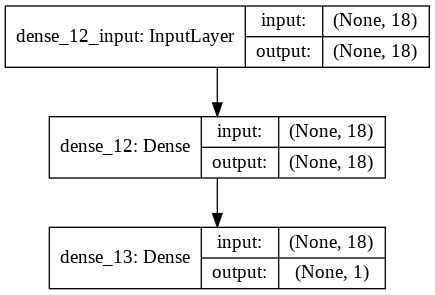

In [64]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [65]:
loss=pd.DataFrame(model.history.history)
loss.head()

,loss,mse
0,7.835729e+12,7.835728e+12
1,1.255629e+11,1.255629e+11
2,1.255415e+11,1.255415e+11
3,1.255677e+11,1.255677e+11
4,1.255888e+11,1.255889e+11


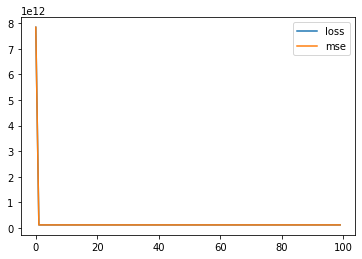

In [66]:
loss.plot()

In [0]:
def model_creating():
    model=Sequential()
    model.add(Dense(18,activation="relu"))
    model.add(Dense(18,activation="relu"))
    model.add(Dense(18,activation="relu"))
    model.add(Dense(18,activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer="adam",loss="mse")
    return model

In [0]:
model=model_creating()

In [48]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
         batch_size=130,epochs=50,verbose=1)

Train on 16209 samples, validate on 5404 samples
Epoch 1/150
16209/16209 [==============================] - 0s 20us/step - loss: 411986195208.5444 - val_loss: 406070276650.8246
Epoch 2/150
16209/16209 [==============================] - 0s 12us/step - loss: 410019749789.4473 - val_loss: 399434570933.1518
Epoch 3/150
16209/16209 [==============================] - 0s 13us/step - loss: 384714220005.6877 - val_loss: 343732540741.1636
Epoch 4/150
16209/16209 [==============================] - 0s 13us/step - loss: 277241707785.9026 - val_loss: 189076950794.4219
Epoch 5/150
16209/16209 [==============================] - 0s 12us/step - loss: 130707443168.9496 - val_loss: 98092747196.1628
Epoch 6/150
16209/16209 [==============================] - 0s 12us/step - loss: 94783573951.3090 - val_loss: 94696144088.0178
Epoch 7/150
16209/16209 [==============================] - 0s 12us/step - loss: 92962740631.4773 - val_loss: 93407382678.8335
Epoch 8/150
16209/16209 [==============================] - 0

In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_8 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_9 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_10 (Dense)             (None, 18)                342       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 19        
Total params: 1,387
Trainable params: 1,387
Non-trainable params: 0
_________________________________________________________________


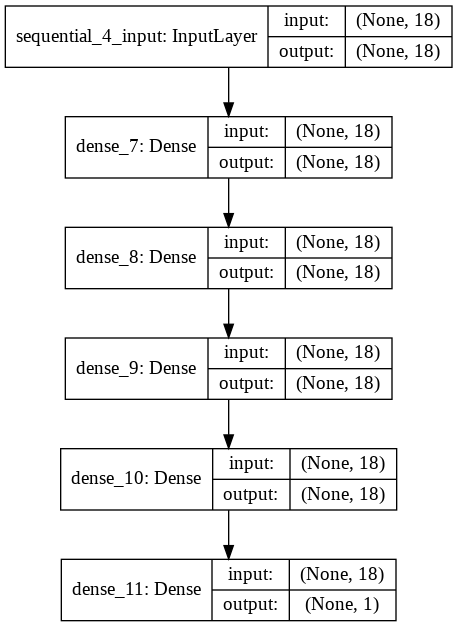

In [52]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [53]:
loss=pd.DataFrame(model.history.history)
loss.head()

,val_loss,loss
0,4.060703e+11,4.119862e+11
1,3.994346e+11,4.100197e+11
2,3.437325e+11,3.847142e+11
3,1.890770e+11,2.772417e+11
4,9.809275e+10,1.307074e+11


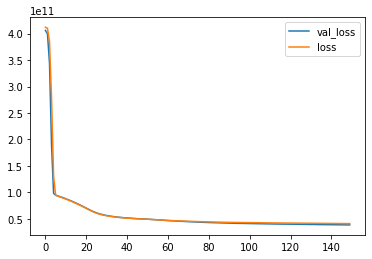

In [54]:
loss.plot()

In [0]:
pred40=model.predict(X_test)

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

error=pd.DataFrame([[mean_squared_error(y_test,pred40),
                     np.sqrt(mean_squared_error(y_test,pred40)),
                    mean_absolute_error(y_test,pred40),
                    explained_variance_score(y_test,pred40)]],
                   columns=["mean_squared_error","mean_squared_root_error",
                                 "mean_absolute_error","explained_variance_score"])
error

,mean_squared_error,mean_squared_root_error,mean_absolute_error,explained_variance_score
0,3.847834e+10,196158.968099,117721.073535,0.692746


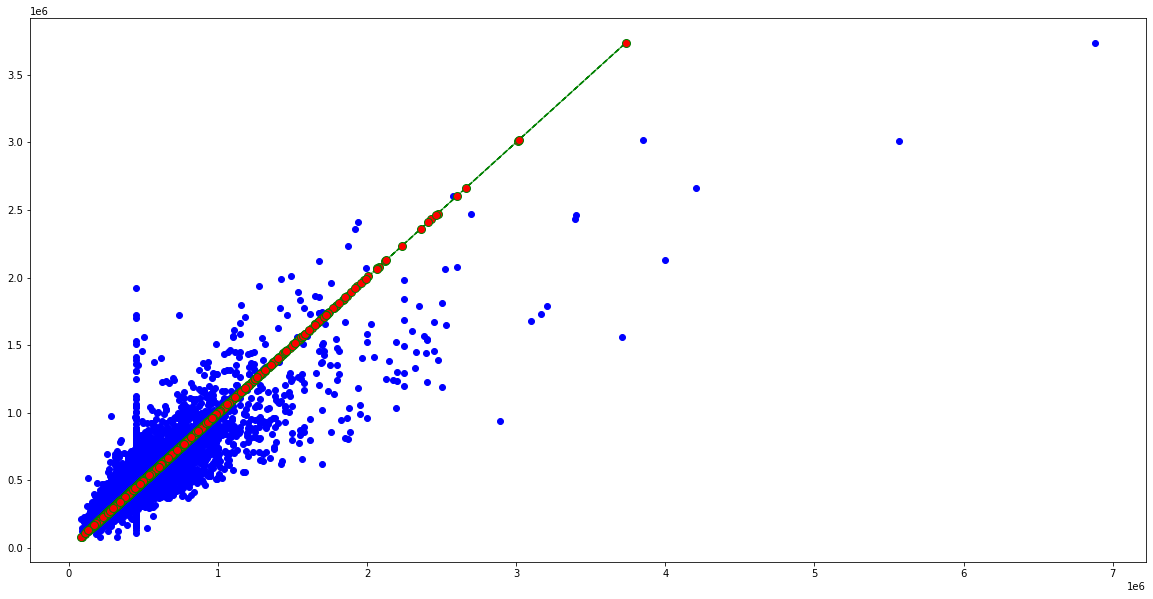

In [70]:
plt.figure(figsize=(20,10))
plt.scatter(y_test,pred40,color="blue",marker="o")
plt.plot(pred40,pred40,marker='o',
         color='green',markerfacecolor='red',
         markersize=8,linestyle='dashed')

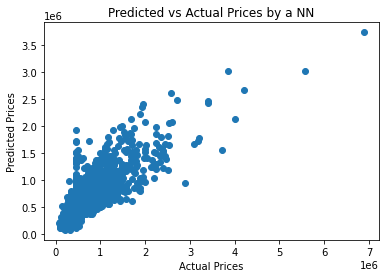

In [72]:
plt.plot(y_test,pred40,'o')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices by a NN")
plt.show()